In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('Salary.csv')

In [ ]:
data.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [ ]:
data.shape

(35, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

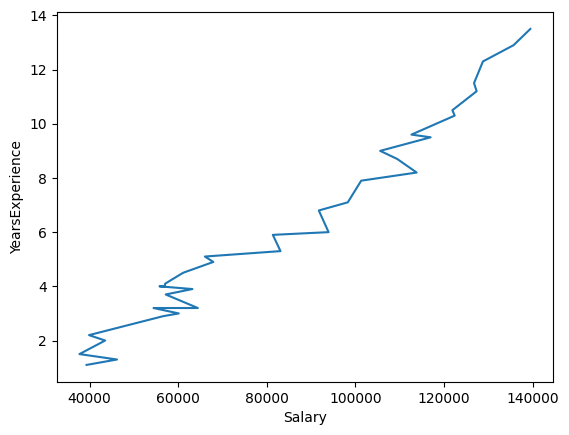

In [ ]:
#will plot a line graph

plt.plot(data['Salary'],data['YearsExperience'])
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

<ipython-input-44-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

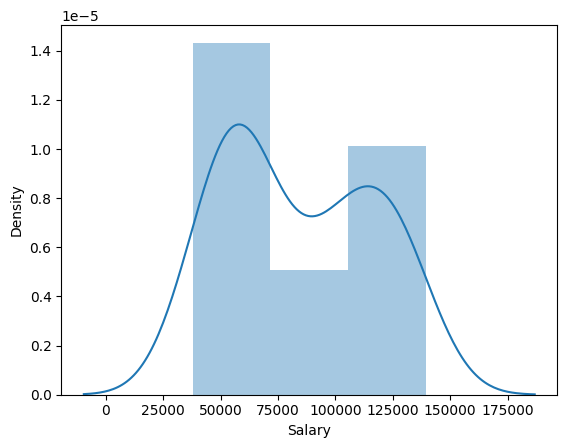

In [ ]:
sns.distplot(data['Salary'])

In [ ]:
cor=data.corr()

<Axes: >

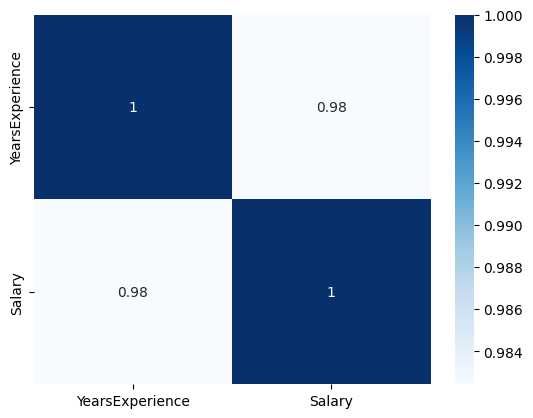

In [ ]:
sns.heatmap(cor,annot=True, cmap='Blues')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x=data['YearsExperience'].values.reshape(-1,1)

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
y=data['Salary'].values.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([[120057.87672477],
       [ 88127.64484315],
       [ 73456.99776241],
       [118331.91824468],
       [ 97620.41648363],
       [ 71731.03928232],
       [ 63101.24688189]])

In [ ]:
#will predict new values
model.predict([[5.6]])

array([[77771.89396263]])

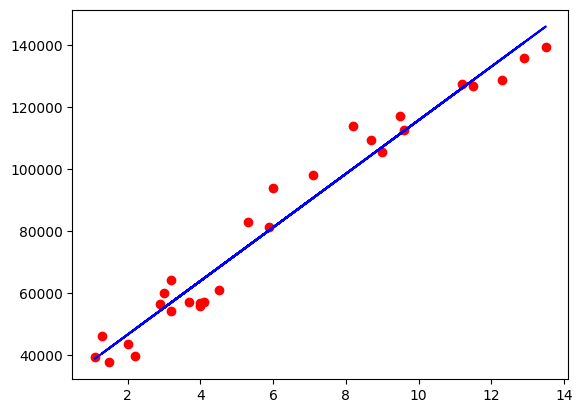

In [ ]:
#will plot
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')

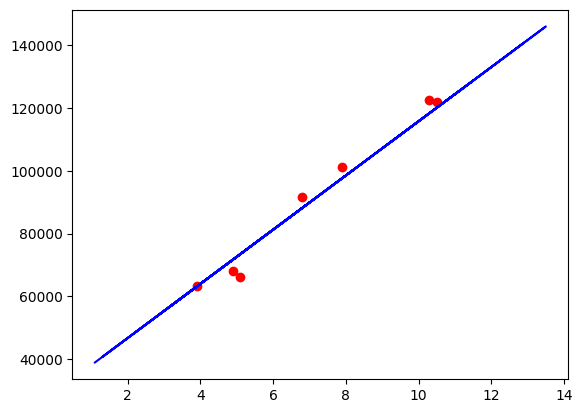

In [ ]:
#will add new predction line for new values
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')

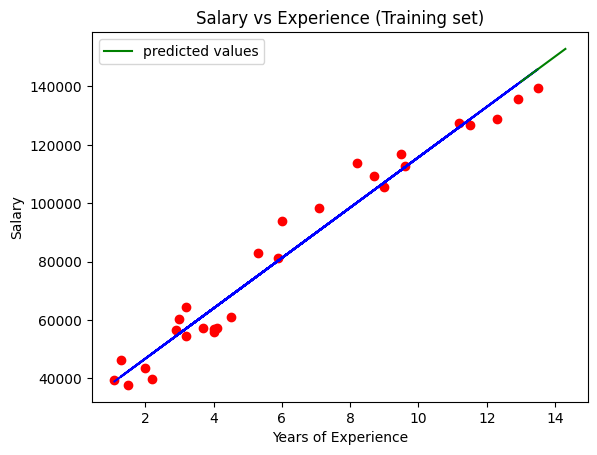

In [ ]:
#will plot a prediction
a=[[13.0],[13.5],[13.7],[14.0],[14.3]]
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.plot(a,model.predict(a),color='green',label='predicted values')
plt.legend()
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
#will check performance
r2_score(y_test,y_pred)

0.9708090245443415

In [ ]:
mean_squared_error(y_test,y_pred)

16561691.220974546

In [ ]:
r2_score(y_train,model.predict(x_train))

0.9638371903672509

In [ ]:
mean_squared_error(y_train,model.predict(x_train))

39788280.126106225